<a href="https://colab.research.google.com/github/SAMADIPERERA/PS_2019_246-Deep_Learning_Mini_Project.ipynb/blob/main/PS_2019_246_Mini_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/My Drive/Colab Notebooks/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [151]:
data=pd.read_csv('HistoricalPricesCOMBANK.csv')



In [152]:
data

,Date,Open,High,Low,Close,Volume
0,1/2/2024,95.50,98.00,94.50,96.90,1.205910e+05
1,12/29/2023,94.50,95.60,94.50,95.50,3.839420e+05
2,12/28/2023,93.10,94.50,92.90,94.30,6.458040e+05
3,12/27/2023,92.40,94.00,91.70,93.10,7.887200e+04
4,12/22/2023,92.80,93.50,92.60,92.90,1.200880e+05
...,...,...,...,...,...,...
4751,11/21/2003,14.21,14.45,13.79,14.21,4.200624e+05
4752,11/20/2003,13.83,14.11,13.68,13.83,4.141792e+05
4753,11/19/2003,13.90,14.28,13.77,13.90,8.283584e+05
4754,11/18/2003,13.32,13.62,13.19,13.32,1.153113e+06


In [153]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date
data = data.sort_values('Date')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Plot the original data


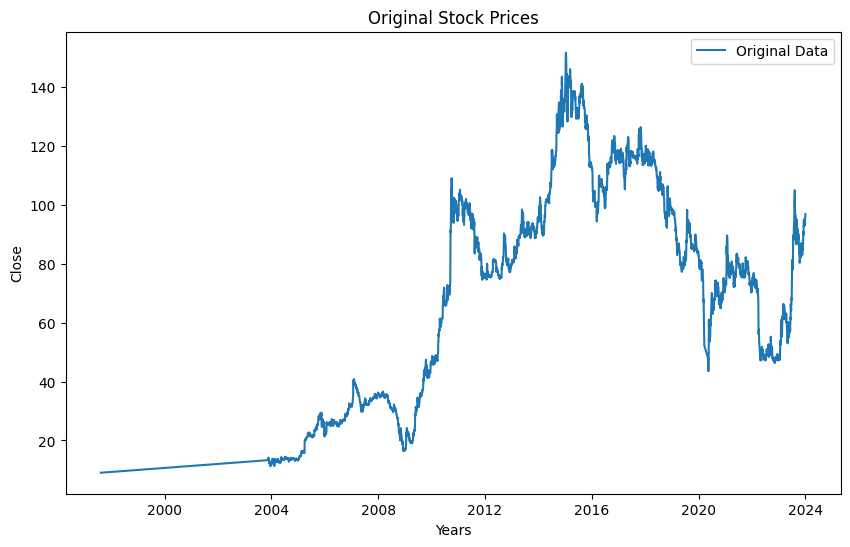

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data[' Close'], label='Original Data')
plt.title('Original Stock Prices')
plt.xlabel('Years')
plt.ylabel('Close')
plt.legend()
plt.show()


In [157]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


# Define a function to create dataset


In [158]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Split data into train and test sets


In [159]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]


# Create train and test datasets


In [160]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


# Reshape input to be [samples, time steps, features]


In [161]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model

In [162]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [163]:

history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2)

Epoch 1/100
58/58 - 12s - loss: 0.0223 - 12s/epoch - 199ms/step
Epoch 2/100
58/58 - 6s - loss: 4.1594e-04 - 6s/epoch - 108ms/step
Epoch 3/100
58/58 - 7s - loss: 3.8647e-04 - 7s/epoch - 126ms/step
Epoch 4/100
58/58 - 7s - loss: 3.7945e-04 - 7s/epoch - 113ms/step
Epoch 5/100
58/58 - 7s - loss: 3.6480e-04 - 7s/epoch - 125ms/step
Epoch 6/100
58/58 - 7s - loss: 3.5189e-04 - 7s/epoch - 125ms/step
Epoch 7/100
58/58 - 7s - loss: 3.4526e-04 - 7s/epoch - 126ms/step
Epoch 8/100
58/58 - 7s - loss: 3.3551e-04 - 7s/epoch - 113ms/step
Epoch 9/100
58/58 - 7s - loss: 3.2391e-04 - 7s/epoch - 123ms/step
Epoch 10/100
58/58 - 7s - loss: 3.1848e-04 - 7s/epoch - 116ms/step
Epoch 11/100
58/58 - 7s - loss: 3.1887e-04 - 7s/epoch - 118ms/step
Epoch 12/100
58/58 - 7s - loss: 3.0372e-04 - 7s/epoch - 120ms/step
Epoch 13/100
58/58 - 7s - loss: 3.1547e-04 - 7s/epoch - 115ms/step
Epoch 14/100
58/58 - 7s - loss: 2.8118e-04 - 7s/epoch - 123ms/step
Epoch 15/100
58/58 - 6s - loss: 2.7375e-04 - 6s/epoch - 111ms/step
Epoch 

# Plot training loss


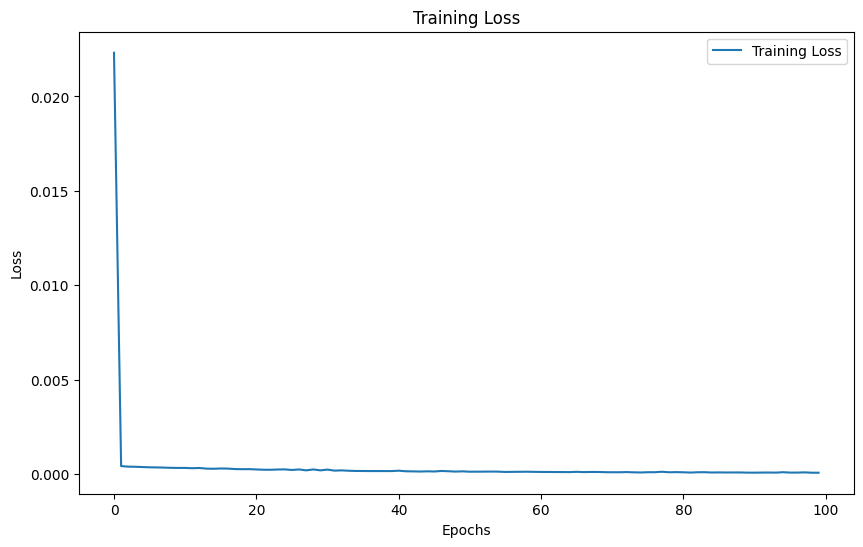

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions


In [196]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

27/27 [==============================] - 1s 27ms/step


# Inverse transform predictions manually


In [202]:
train_predict_inv = train_predict * (data[' Close'].max() - data[' Close'].min()) + data[' Close'].min()
test_predict_inv = test_predict * (data[' Close'].max() - data[' Close'].min()) + data[' Close'].min()


# Plotting training and testing data separately


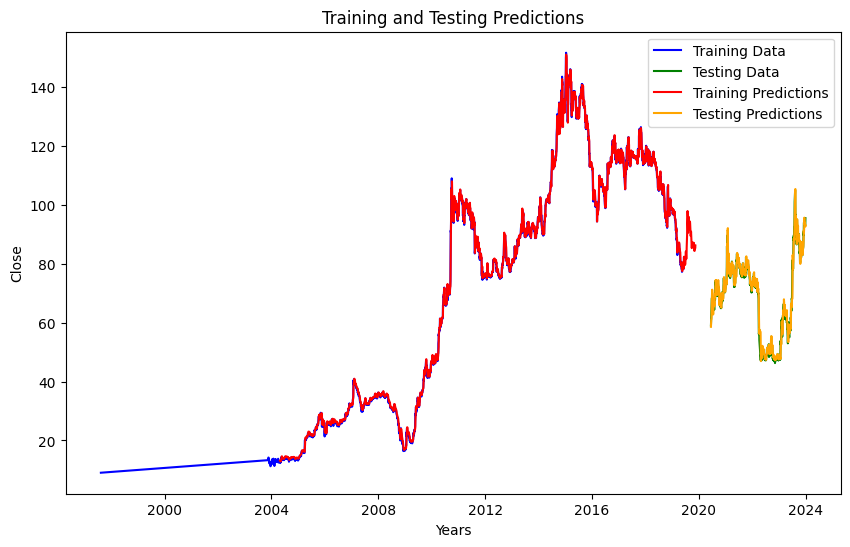

In [224]:
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(data.index[:len(train_predict_inv)], data[' Close'][:len(train_predict_inv)], color='blue', label='Training Data')

# Plot testing data
plt.plot(data.index[len(train_predict_inv)+2*time_step+1:len(train_predict_inv)+2*time_step+1+len(test_predict_inv)], data[' Close'][len(train_predict_inv)+2*time_step+1:len(train_predict_inv)+2*time_step+1+len(test_predict_inv)], color='green', label='Testing Data')

# Plot training predictions
plt.plot(data.index[time_step:time_step+len(train_predict_inv)], train_predict_inv, color='red', label='Training Predictions')

# Plot testing predictions
plt.plot(data.index[len(train_predict_inv)+2*time_step+1:len(train_predict_inv)+2*time_step+1+len(test_predict_inv)], test_predict_inv, color='orange', label='Testing Predictions')

plt.title('Training and Testing Predictions')
plt.xlabel('Years')
plt.ylabel('Close')
plt.legend()
plt.show()


# Calculate RMSE


In [231]:
train_rmse = np.sqrt(mean_squared_error(data[' Close'][time_step:len(train_predict_inv)+time_step], train_predict_inv))
test_rmse = np.sqrt(mean_squared_error(data[' Close'][len(train_predict_inv)+(time_step*2)+1:len(scaled_data)-1], test_predict_inv))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 1.0855609832290656
Test RMSE: 2.0986485874379377


Train RMSE: 1.0855609832290656
Test RMSE: 2.0986485874379377


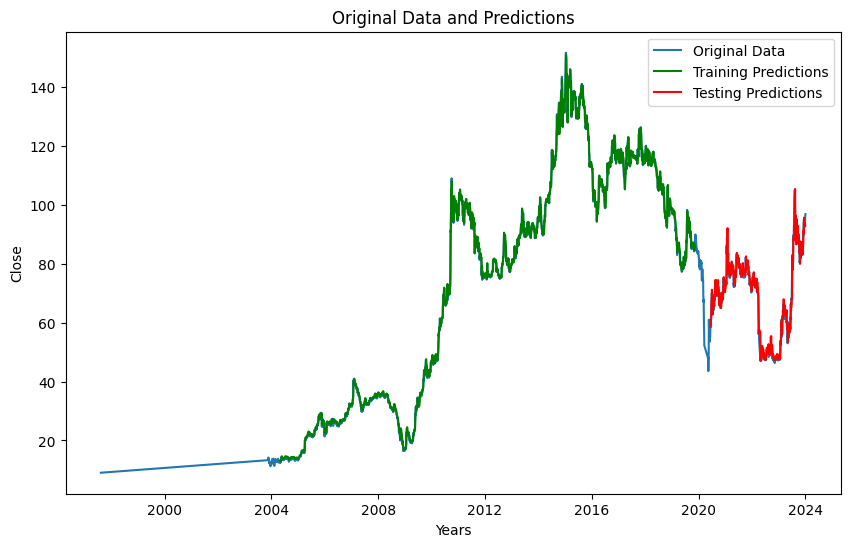

In [232]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(data[' Close'][time_step:time_step+len(train_predict_inv)], train_predict_inv))
test_rmse = np.sqrt(mean_squared_error(data[' Close'][len(train_predict_inv)+2*time_step+1:len(data)-1], test_predict_inv))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# Plotting original data and predictions
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(data.index, data[' Close'], label='Original Data')

# Plot training predictions
plt.plot(data.index[time_step:time_step+len(train_predict_inv)], train_predict_inv, label='Training Predictions', color='green')

# Plot testing predictions
plt.plot(data.index[len(train_predict_inv)+2*time_step+1:len(data)-1], test_predict_inv, label='Testing Predictions', color='red')

plt.title('Original Data and Predictions')
plt.xlabel('Years')
plt.ylabel('Close')
plt.legend()
plt.show()
